### An NLP Approach to Mining Online Reviews using Topic Modeling (with Python codes)
- https://www.analyticsvidhya.com/blog/2018/10/mining-online-reviews-topic-modeling-lda/
- https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/
- https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

### Pre1: A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis

![](Picture inserted/NLP intro1.png)

- This black box (topic model) forms clusters of similar and related words which are called topics. These topics have a certain distribution in a document, and every topic is defined by the proportion of different words it contains.

![](Picture inserted/NLP intro2.png)

### Overview of Latent Semantic Analysis (LSA)

- For example, consider the following two sentences:
    - I liked his last novel quite a lot.
    - We would like to go for a novel marketing campaign.
- In the first sentence, the word ‘novel’ refers to a book, and in the second sentence it means new or fresh.
- We can easily distinguish between these words because we are able to understand the context behind these words. However, a machine would not be able to capture this concept as it cannot understand the context in which the words have been used. This is where Latent Semantic Analysis (LSA) comes into play as it attempts to leverage the context around the words to capture the hidden concepts, also known as topics.
- So, simply mapping words to documents won’t really help. What we really need is to figure out the hidden concepts or topics behind the words. LSA is one such technique that can find these hidden topics. Let’s now deep dive into the inner workings of LSA.

### Steps involved in the implementation of LSA

Let’s say we have m number of text documents with n number of total unique terms (words). We wish to extract k topics from all the text data in the documents. The number of topics, k, has to be specified by the user.
- Generate a document-term matrix of shape m x n having TF-IDF scores.

![](Picture inserted/NLP intro3.png)

Then, we will reduce the dimensions of the above matrix to k (no. of desired topics) dimensions, using singular-value decomposition (SVD).

- Each row of the matrix Uk (document-term matrix) is the vector representation of the corresponding document. The length of these vectors is k, which is the number of desired topics. Vector representation for the terms in our data can be found in the matrix Vk (term-topic matrix).
- So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. We can then use these vectors to find similar words and similar documents using the cosine similarity method.

![](Picture inserted/NLP intro4.png)

In [3]:
# read the data first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [5]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [6]:
# show documents content a little bit
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [7]:
# The dataset has 11,314 text documents distributed across 20 different newsgroups.
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
# Data Preprocessing
# To start with, we will try to clean our text data as much as possible. 
# The idea is to remove the punctuations, numbers, and 
# special characters all in one step using the regex replace(“[^a-zA-Z#]”, ” “), 
# which will replace everything, except alphabets with space. 

# Then we will remove shorter words because they usually don’t contain useful information. 
# Finally, we will make all the text lowercase to nullify case sensitivity.

news_df = pd.DataFrame({'document':documents})
# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")
# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())
news_df.head(2)

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences su...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that wil...


In [10]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# To remove stop-words from the documents, we will have to tokenize the text, 
# i.e., split the string of text into individual tokens or words. 
# We will stitch the tokens back together once we have removed the stop-words.

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
news_df['clean_doc'] = detokenized_doc
news_df.head(2)

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgrou...


In [12]:
# Document-Term Matrix
# This is the first step towards topic modeling. 
# We will use sklearn’s TfidfVectorizer to create a document-term matrix with 1,000 terms.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
                             max_features= 1000, # keep top 1000 terms 
                             max_df = 0.5, 
                             smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # check shape of the document-term matrix

(11314, 1000)

### Topic Modeling
- The next step is to represent each and every term and document as a vector. We will use the document-term matrix and decompose it into multiple matrices. We will use sklearn’s TruncatedSVD to perform the task of matrix decomposition.
- Since the data comes from 20 different newsgroups, let’s try to have 20 topics for our text data. The number of topics can be specified by using the n_components parameter.

### TFIDF Algorithm: play with term frequency
- TF-IDF is an abbreviation for Term Frequency-Inverse Document Frequency and is a very common algorithm to transform text into a meaningful representation of numbers. The technique is widely used to extract features across various NLP applications.
### Pre for the TFIDF
- One of the simplest ways to represent text in the form of numbers is how many times the word occurs in the entire corpus.
- We assume that higher values of a word would simply mean greater importance in the given text. This is true but what if the documents across our corpus are of different sizes? In that case, the bigger size documents would naturally have more occurrences of words than smaller documents. Therefore, a better representation would be to normalize the occurrence of the word with the size of the document and is called term-frequency.
    - Numerically, term frequency of a word is defined as follows:
        - tf(w) = doc.count(w)/total words in doc

### Inverse Document Frequency
- While computing term-frequency, each term is considered equally important and given a chance to participate in vector representation. But, there would be certain words which are so common across documents that they may contribute very little in deciding the meaning of it. Term frequency of such words for example ‘the’, ‘a’, ‘in’, ‘of’ etc might suppress the weights of more meaningful words. Therefore, to reduce this effect, the term frequency is discounted by a factor called inverse document frequency.
    - idf(w) = log(total number of documents/number of documents containing word w)

### Term Frequency-Inverse Document Frequency
- As a result, we have a vector representation which gives high value for a given term if that term occurs often in that particular document and very rarely anywhere else. If the term occurs in all the documents, idf computed would be 0. TF-IDF is the product of term-frequency and inverse document frequency.
    - Tf-idf(w) = tf(w)*idf(w)
- The more important a word is in the document, it would get a higher tf-idf score and vice versa.

In [21]:
# a small example
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
 
corpus=["this car got the excellence award",\
         "good car gives good mileage",\
         "this car is very expensive",\
         "the company is growing with very high production",\
         "this company is financially good"]
vocabulary = set()
for doc in corpus:
    vocabulary.update(doc.split())
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
print(vocabulary)
print(" ")
print(word_index)

['growing', 'this', 'is', 'with', 'mileage', 'good', 'high', 'the', 'company', 'excellence', 'got', 'car', 'expensive', 'production', 'very', 'award', 'gives', 'financially']
 
{'growing': 0, 'this': 1, 'is': 2, 'with': 3, 'mileage': 4, 'good': 5, 'high': 6, 'the': 7, 'company': 8, 'excellence': 9, 'got': 10, 'car': 11, 'expensive': 12, 'production': 13, 'very': 14, 'award': 15, 'gives': 16, 'financially': 17}


In [22]:
tfidf = TfidfVectorizer(vocabulary=vocabulary)
# Fit the TfIdf model
tfidf.fit(corpus)
tfidf.transform(corpus)
for doc in corpus:
    score={}
    print(doc)
    # Transform a document into TfIdf coordinates
    X = tfidf.transform([doc])
    for word in doc.split():
        score[word] = X[0, tfidf.vocabulary_[word]]
    sortedscore = sorted(score.items(), key=operator.itemgetter(1), reverse=True)
    print("\t", sortedscore)

this car got the excellence award
	 [('got', 0.4689132131547637), ('excellence', 0.4689132131547637), ('award', 0.4689132131547637), ('the', 0.3783162278555838), ('this', 0.3140366438234139), ('car', 0.3140366438234139)]
good car gives good mileage
	 [('good', 0.7178821805115433), ('gives', 0.4448982295027494), ('mileage', 0.4448982295027494), ('car', 0.2979535293877717)]
this car is very expensive
	 [('expensive', 0.5776914793752232), ('very', 0.4660778481185906), ('this', 0.38688671647327205), ('car', 0.38688671647327205), ('is', 0.38688671647327205)]
the company is growing with very high production
	 [('growing', 0.39524574252810757), ('with', 0.39524574252810757), ('high', 0.39524574252810757), ('production', 0.39524574252810757), ('the', 0.31888177640211135), ('company', 0.31888177640211135), ('very', 0.31888177640211135), ('is', 0.26470068018333703)]
this company is financially good
	 [('financially', 0.5591166343026757), ('company', 0.4510917800707943), ('good', 0.45109178007079

### Application of TF-IDF
1. Document classification: TF-IDF forms a fundamental feature vector to train various classifiers such as LSI, SVM etc.

2. Topic Modeling: For auto tagging the documents, one way is to use TF-IDF directly where we train a model by computing the vector for each document and setting a threshold. Terms with scores above this threshold can participate in predicting the topics for new documents. Alternatively, TF-IDF features as an input to the algorithm such as LDA, LLDA etc. helps to obtain better accuracy and performance. We will learn all about these in the upcoming tutorials.

3. Information retrieval systems: TF-IDF complements text mining and search algorithms by assigning a score representing how important the word is in defining the meaning of the document. The search results would be better if these important words closely relate to the search query.

4. Stop word filtering: TF-IDF is also a highly useful tool to filter out less important common words and can remove the requirement to manually maintain an extensive list of stop words.

In [13]:
# could have used all the terms to create this matrix 
# but that would need quite a lot of computation time and resources.

from sklearn.decomposition import TruncatedSVD
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [14]:
svd_model

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=100,
       random_state=122, tol=0.0)

In [15]:
# The components of svd_model are our topics, and we can access them using svd_model.components_. 
# Finally, let’s print a few most important words in each of the 20 topics and see how our model has done.

terms = vectorizer.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:3]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    # just print the first three topic
    if i>3:
        break

Topic 0: 
like
know
people
Topic 1: 
thanks
windows
card
Topic 2: 
game
team
year
Topic 3: 
drive
scsi
disk
Topic 4: 
windows
file
window


### Topics Visualization
- To find out how distinct our topics are, we should visualize them. Of course, we cannot visualize more than 3 dimensions, but there are techniques like PCA and t-SNE which can help us visualize high dimensional data into lower dimensions. Here we will use a relatively new technique called UMAP (Uniform Manifold Approximation and Projection).

In [36]:
!pip install umap-learn

  Running setup.py bdist_wheel for umap-learn: started
  Running setup.py bdist_wheel for umap-learn: finished with status 'done'
  Stored in directory: C:\Users\TK\AppData\Local\pip\Cache\wheels\6c\96\d5\d68c1a2271b9225bb2f44df286311d0deb0d28b0ec9349e053
Successfully built umap-learn


You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
import umap.umap_ as umap

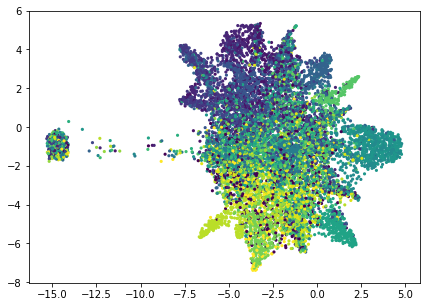

In [17]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c = dataset.target,
            s = 10, # size
            edgecolor='none')
plt.show()

### Explanation:
- Each dot represents a document and the colours represent the 20 newsgroups. Our LSA model seems to have done a good job. Feel free to play around with the parameters of UMAP to see how the plot changes its shape.

## Extension for LDA analysis NLP

![](Picture inserted/NLP introLDA.png)

### Latent Dirichlet Allocation for Topic Modeling
- There are many approaches for obtaining topics from a text such as – Term Frequency and Inverse Document Frequency. NonNegative Matrix Factorization techniques. Latent Dirichlet Allocation is the most popular topic modeling technique and in this article, we will discuss the same.
- LDA assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.
- LDA is a matrix factorization technique. In vector space, any corpus (collection of documents) can be represented as a document-term matrix. The following matrix shows a corpus of N documents D1, D2, D3 … Dn and vocabulary size of M words W1,W2 .. Wn. The value of i,j cell gives the frequency count of word Wj in Document Di.

![](Picture inserted/LDA-matrix1.png)

- LDA converts this Document-Term Matrix into two lower dimensional matrices – M1 and M2.
- M1 is a document-topics matrix and M2 is a topic – terms matrix with dimensions (N,  K) and (K, M) respectively, where N is the number of documents, K is the number of topics and M is the vocabulary size.

![](Picture inserted/LDA-matrix2.png)

- Notice that these two matrices already provides topic word and document topic distributions, However, these distribution needs to be improved, which is the main aim of LDA. LDA makes use of sampling techniques in order to improve these matrices.
- It Iterates through each word “w” for each document “d” and tries to adjust the current topic – word assignment with a new assignment. A new topic “k” is assigned to word “w” with a probability P which is a product of two probabilities p1 and p2.
- For every topic, two probabilities p1 and p2 are calculated. 
    - P1 – p(topic t / document d) = the proportion of words in document d that are currently assigned to topic t. 
    - P2 – p(word w / topic t) = the proportion of assignments to topic t over all documents that come from this word w.
- The current topic – word assignment is updated with a new topic with the probability, product of p1 and p2 . In this step, the model assumes that all the existing word – topic assignments except the current word are correct. This is essentially the probability that topic t generated word w, so it makes sense to adjust the current word’s topic with new probability.
- After a number of iterations, a steady state is achieved where the document topic and topic term distributions are fairly good. This is the convergence point of LDA.

### Parameters of LDA
- Alpha and Beta Hyperparameters – alpha represents document-topic density and Beta represents topic-word density. Higher the value of alpha, documents are composed of more topics and lower the value of alpha, documents contain fewer topics. On the other hand, higher the beta, topics are composed of a large number of words in the corpus, and with the lower value of beta, they are composed of few words.
- Number of Topics – Number of topics to be extracted from the corpus. Researchers have developed approaches to obtain an optimal number of topics by using Kullback Leibler Divergence Score. I will not discuss this in detail, as it is too mathematical. 
- Number of Topic Terms – Number of terms composed in a single topic. It is generally decided according to the requirement. If the problem statement talks about extracting themes or concepts, it is recommended to choose a higher number, if problem statement talks about extracting features or terms, a low number is recommended.
- Number of Iterations / passes – Maximum number of iterations allowed to LDA algorithm for convergence.

In [23]:
# implementation
# preparing for the document
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."
# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [27]:
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [43]:
# Cleaning and Preprocessing
# Cleaning is an important step before any text mining task, 
# in this step, we will remove the punctuations, stopwords and normalize the corpus.

from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]

### Preparing Document-Term Matrix
- All the text documents combined is known as the corpus. To run any mathematical model on text corpus, it is a good practice to convert it into a matrix representation. 
- LDA model looks for repeating term patterns in the entire DT matrix. Python provides many great libraries for text mining practices, “gensim” is one such clean and beautiful library to handle text data. It is scalable, robust and efficient. Following code shows how to convert a corpus into a document-term matrix.

In [46]:
# Importing Gensim
import gensim
from gensim import corpora

import warnings
warnings.filterwarnings('ignore')

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

### Running LDA Model
- Next step is to create an object for LDA model and train it on Document-Term matrix. The training also requires few parameters as input which are explained in the above section. The gensim module allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents.

In [47]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [49]:
ldamodel.print_topics(num_topics=3, num_words=3)
# Each line is a topic with individual topic terms and weights. 
# Topic1 can be termed as Bad Health, and Topic3 can be termed as Family.

[(0, '0.073*"father" + 0.073*"sister" + 0.073*"sugar"'),
 (1, '0.065*"driving" + 0.065*"pressure" + 0.064*"may"'),
 (2, '0.029*"health" + 0.029*"lifestyle" + 0.029*"expert"')]

### Tips to improve results of topic modeling
- The results of topic models are completely dependent on the features (terms) present in the corpus. The corpus is represented as document term matrix, which in general is very sparse in nature. Reducing the dimensionality of the matrix can improve the results of topic modelling. Based on my practical experience, there are few approaches which do the trick.

1. Frequency Filter – Arrange every term according to its frequency. Terms with higher frequencies are more likely to appear in the results as compared ones with low frequency. The low frequency terms are essentially weak features of the corpus, hence it is a good practice to get rid of all those weak features. An exploratory analysis of terms and their frequency can help to decide what frequency value should be considered as the threshold.

![](Picture inserted/LDA-frequency1.png)

- Part of Speech Tag Filter – POS tag filter is more about the context of the features than frequencies of features. Topic Modelling tries to map out the recurring patterns of terms into topics. However, every term might not be equally important contextually. For example, POS tag IN contain terms such as – “within”, “upon”, “except”. “CD” contains – “one”,”two”, “hundred” etc. “MD” contains “may”, “must” etc. These terms are the supporting words of a language and can be removed by studying their post tags.

![](Picture inserted/LDA-frequency2.png)

- Batch Wise LDA –In order to retrieve most important topic terms, a corpus can be divided into batches of fixed sizes. Running LDA multiple times on these batches will provide different results, however, the best topic terms will be the intersection of all batches.

### Go back to Topic modeling and implementation right now

In [1]:
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\TK\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Recommendation system data source
- http://jmcauley.ucsd.edu/data/amazon/

In [4]:
df = pd.read_json('Automotive_5.json', lines=True)
df.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002243X,"[4, 4]",5,I needed a set of jumper cables for my new car and these had good reviews and were at a good price. They have been used a few times already and do what they are supposed to - no complaints there....,"08 17, 2011",A3F73SC1LY51OO,Alan Montgomery,Work Well - Should Have Bought Longer Ones,1313539200
1,B00002243X,"[1, 1]",4,"These long cables work fine for my truck, but the quality seems a little on the shabby side. For the money I was not expecting 200 dollar snap-on jumper cables but these seem more like what you wo...","09 4, 2011",A20S66SKYXULG2,alphonse,Okay long cables,1315094400
2,B00002243X,"[0, 0]",5,"Can't comment much on these since they have not yet been used (I will come back and update my review is I find any issues after first use) ... but they are built solid, nice tough big hard clamps ...","07 25, 2013",A2I8LFSN2IS5EO,Chris,Looks and feels heavy Duty,1374710400


### Introduction of Dataset
- reviewerID – ID of the reviewer
- asin – ID of the product
- reviewerName – name of the reviewer
- helpful – helpfulness rating of the review, e.g. 2/3
- reviewText – text of the review
- overall – rating of the product
- summary – summary of the review
- unixReviewTime – time of the review (unix time)
- reviewTime – time of the review (raw)

In [5]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

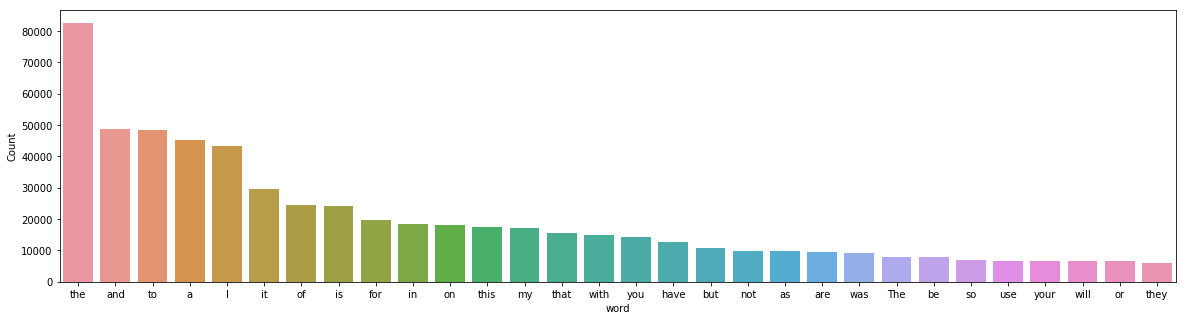

In [7]:
freq_words(df['reviewText'])

In [8]:
# remove punctuations and numbers first 
# remove unwanted characters, numbers and symbols
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

In [12]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]
# make entire text lowercase
reviews = [r.lower() for r in reviews]

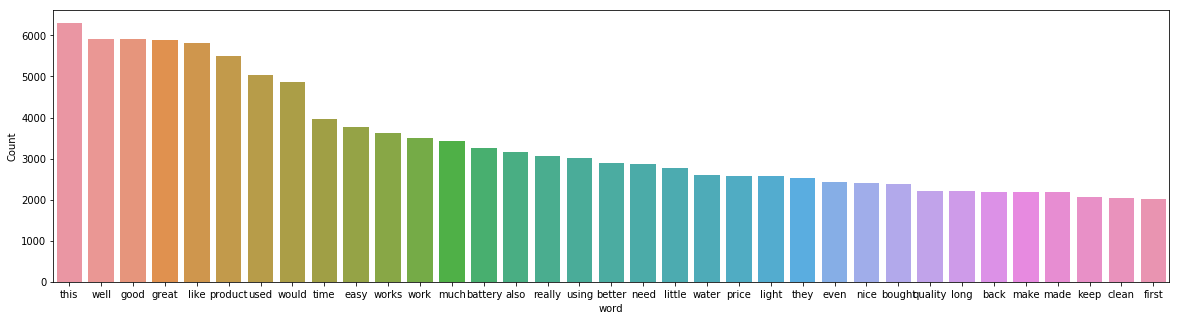

In [13]:
freq_words(reviews, 35)

- To further remove noise from the text we can use lemmatization from the spaCy library. It reduces any given word to its base form thereby reducing multiple forms of a word to a single word.

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [44]:
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    doc = nlp(texts)
    output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [45]:
# Let’s tokenize the reviews and then lemmatize the tokenized reviews.
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['these', 'long', 'cables', 'work', 'fine', 'truck', 'quality', 'seems', 'little', 'shabby', 'side', 'money', 'expecting', 'dollar', 'snap', 'jumper', 'cables', 'seem', 'like', 'would', 'chinese', 'knock', 'shop', 'like', 'harbor', 'freight', 'bucks']


In [59]:
reviews[0]

'needed jumper cables good reviews good price they used times already supposed complaints what feet really ideal length sure pull front bumper front bumper plenty long times beside another really close because would recommend something little longer great brand version though'

In [60]:
# update now
reviews_2 = lemmatization(reviews[0])
print(reviews_2[0]) # print lemmatized review

['jumper', 'good', 'review', 'good', 'price', 'time', 'complaint', 'what', 'foot', 'ideal', 'length', 'front', 'bumper', 'front', 'bumper', 'plenty', 'long', 'time', 'close', 'something', 'little', 'great', 'brand', 'version']


### Building an LDA model
We will start by creating the term dictionary of our corpus, where every unique term is assigned an index

In [ ]:
dictionary = corpora.Dictionary(reviews_2)
# convert the list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, 
                num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [62]:
lda_model.print_topics()

[(0,
  '0.050*"length" + 0.050*"jumper" + 0.050*"version" + 0.050*"something" + 0.050*"review" + 0.050*"price" + 0.050*"plenty" + 0.050*"long" + 0.050*"little" + 0.050*"brand"'),
 (1,
  '0.050*"length" + 0.050*"jumper" + 0.050*"version" + 0.050*"something" + 0.050*"review" + 0.050*"price" + 0.050*"plenty" + 0.050*"long" + 0.050*"little" + 0.050*"brand"'),
 (2,
  '0.050*"length" + 0.050*"jumper" + 0.050*"version" + 0.050*"something" + 0.050*"review" + 0.050*"price" + 0.050*"plenty" + 0.050*"long" + 0.050*"little" + 0.050*"brand"'),
 (3,
  '0.050*"length" + 0.050*"jumper" + 0.050*"version" + 0.050*"something" + 0.050*"review" + 0.050*"price" + 0.050*"plenty" + 0.050*"long" + 0.050*"little" + 0.050*"brand"'),
 (4,
  '0.050*"length" + 0.050*"jumper" + 0.050*"version" + 0.050*"something" + 0.050*"review" + 0.050*"price" + 0.050*"plenty" + 0.050*"long" + 0.050*"little" + 0.050*"brand"'),
 (5,
  '0.050*"length" + 0.050*"jumper" + 0.050*"version" + 0.050*"something" + 0.050*"review" + 0.050*"p

### Topics Visualization
- To visualize our topics in a 2-dimensional space we will use the pyLDAvis library. This visualization is interactive in nature and displays topics along with the most relevant words.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

### Further reading
- Ultimate Guide to Understand & Implement Natural Language Processing (with codes in Python)
    - https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/

## Now for our own Task IMDb comments and Metascore comments

- Points need to consider:
    - Should we consider each comment for each movie or take all comments for certain movie as a whole
- Some alternative methods for analysis - Method 1:
    - If we take each movie's comments as a whole, then do LDA/LSA to give specific potential topics extracted first and give Top N keywords mentioned in these topics. Multiple topics would help show bias in this case.
    - Second step would infer which topics these words are generated from
    - Try to find the correlation of these topic related words with target topic to classify through wordnet
    - We can also generate our own topic set by using wordnet to replace LIWC just in case.
- Some alternative methods for analysis - Method 2:
    - If we consider them separately, then potential problems would be limitations of frequency inference. But we can still extract Top N keywords for each comments and counts overlapping parts to give further analysis later.

### Extension for wordnet and topic
- http://www.nltk.org/howto/wordnet.html
- https://pythonprogramming.net/wordnet-nltk-tutorial/
- WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus.You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more. Let's cover some examples.

In [64]:
from nltk.corpus import wordnet

In [70]:
# Then we're going to use the term "program" to find synsets like so
syns = wordnet.synsets("program")
# one example from the synsets
print(syns[0].name())
# extract the word
print(syns[0].lemmas()[0].name())
# definition
print(syns[0].definition())
# examples
print(syns[0].examples())

plan.n.01
plan
a series of steps to be carried out or goals to be accomplished
['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [82]:
# The lemmas will be synonyms, and then you can use .antonyms to find the antonyms to the lemmas. 
# As such, we can populate some lists like:
def find_syn_ant(word_):
    synonyms = []
    antonyms = []
    for syn in wordnet.synsets(word_):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
    return synonyms, antonyms

result1, result2 = find_syn_ant("good")
print(set(result1))
print(set(result2))

{'expert', 'ripe', 'in_effect', 'safe', 'unspoiled', 'just', 'goodness', 'full', 'in_force', 'right', 'beneficial', 'commodity', 'honest', 'trade_good', 'estimable', 'salutary', 'good', 'respectable', 'unspoilt', 'adept', 'effective', 'skillful', 'skilful', 'well', 'honorable', 'secure', 'dependable', 'soundly', 'dear', 'practiced', 'undecomposed', 'serious', 'proficient', 'thoroughly', 'upright', 'near', 'sound'}
{'bad', 'evil', 'ill', 'badness', 'evilness'}


In [83]:
result1, result2 = find_syn_ant("bad")
print(set(result1))
print(set(result2))

{'bad', 'big', 'regretful', 'risky', 'defective', 'unsound', 'forged', 'badly', 'tough', 'spoilt', 'badness', 'sorry', 'speculative', 'spoiled', 'unfit', 'high-risk', 'uncollectible'}
{'good', 'unregretful', 'goodness'}


In [80]:
result1, result2 = find_syn_ant("risk")
print(set(result1))
print(set(result2))

{'take_chances', 'jeopardy', 'danger', 'peril', 'run_a_risk', 'endangerment', 'lay_on_the_line', 'risk_of_infection', 'risk', 'hazard', 'chance', 'risk_of_exposure', 'put_on_the_line', 'gamble', 'take_a_chance', 'adventure'}
set()


In [81]:
result1, result2 = find_syn_ant("conservative")
print(set(result1))
print(set(result2))

{'button-down', 'buttoned-down', 'conservative', 'cautious', 'materialistic', 'Conservative', 'conservativist', 'bourgeois'}
{'liberal'}


### Compare the similarity
- Next, we can also easily use WordNet to compare the similarity of two words and their tenses by incorporating the Wu and Palmer method for semantic related-ness.

In [84]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


In [89]:
w1 = wordnet.synset('safe.n.01')
w2 = wordnet.synset('limited.n.01')
print(w1.wup_similarity(w2))

0.631578947368421
